## Задание 1

Аналогично разбиению кол-ва сессий по корзинам ценности, разобранному в ролике, произвести разбиение кол-ва сессий по корзинам длительности и визуализировать его. Использовать уже знакомый датасет sessions.csv. Предлагается сначала исследовать особенности данных, подобрать необходимый "масштаб" и предложить кастомное разбиение исходя из результатов исследования, затем визуализировать наиболее наглядным способом.

Описание датасета sessions.csv
* date - дата, в которую произошла сессия (сессия, лежащая на стыке двух суток относится к суткам ее начала)
* session_id - уникальный идентификатор каждой сессии
* user_id - идентификатор пользователя, проведшего сессию
* duration - продолжительность сессии (в секундах)
* value - некая величина, отражающая ценность сессии (в условных единицах)
* has_purchase - признак наличия покупки внутри сессии

C:\Users\rusan\AppData\Local\Temp\ipykernel_70096\452568713.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dur_bins = data.groupby('duration_bins')['session_id'].count().reset_index()


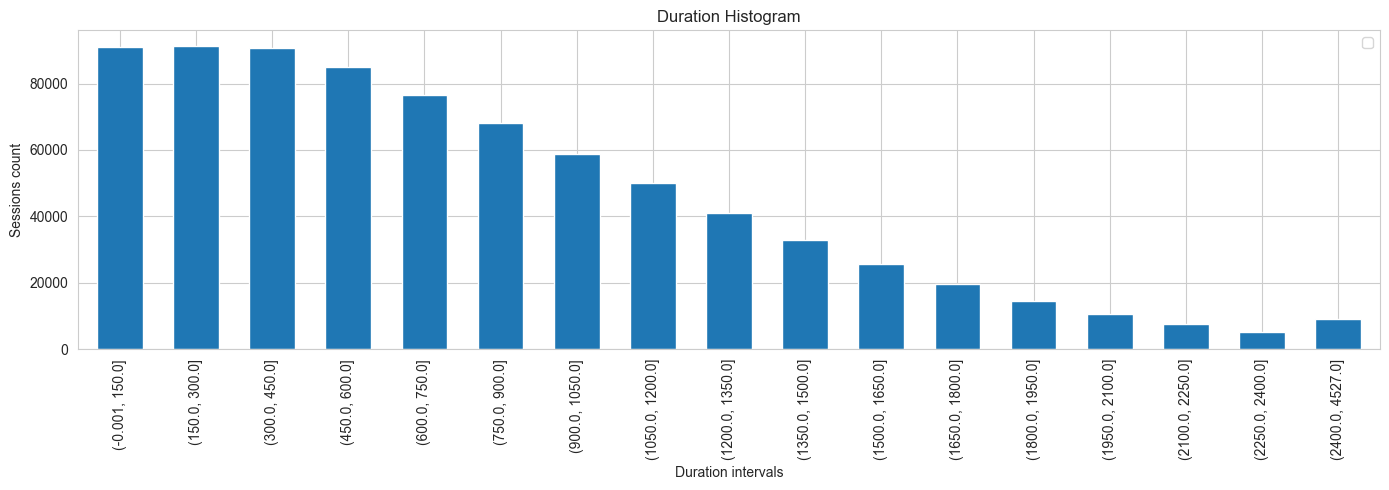

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('sessions.csv')
# data.info()
# data.head()
# data.describe()

# # Точное разделение по длительности
# duration_cnt = data.groupby('duration')['session_id'].count().reset_index()  # session_id user_id
# duration_cnt = duration_cnt.rename(columns={'session_id': 'session_cnt'}) 
# print(len(duration_cnt['duration'].unique()) / len(duration_cnt['session_cnt'].unique()))

# Определение интервалов для визуализации
data['duration_bins'] = pd.cut(data['duration'],
                               bins=[*range(0, 2401, 150), data['duration'].max()],
                               include_lowest=True)

# Разделение по интервалам
dur_bins = data.groupby('duration_bins')['session_id'].count().reset_index()
dur_bins = dur_bins.rename(columns={'session_id': 'session_cnt'})

# Создание и настройка диаграммы
ax = dur_bins.plot.bar(x='duration_bins', y='session_cnt', figsize=(14, 5), width=0.6)

fig = ax.get_figure()

plt.title("Duration Histogram")
plt.xlabel("Duration intervals")
plt.ylabel("Sessions count")
plt.legend('')
plt.tight_layout()
fig.savefig('res/1.png')
plt.show()

## То же самое решение но по шагам

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

data = pd.read_csv('sessions.csv')

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777557 entries, 0 to 777556
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   date          777557 non-null  object
 1   session_id    777557 non-null  int64 
 2   user_id       777557 non-null  int64 
 3   duration      777557 non-null  int64 
 4   value         777557 non-null  int64 
 5   has_purchase  777557 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 35.6+ MB


,date,session_id,user_id,duration,value,has_purchase
0,2022-07-01,785266,109298,1680,137,0
1,2022-07-01,785333,119496,713,77,0
2,2022-07-01,785490,123265,1266,88,0
3,2022-07-01,785585,132511,844,14,0
4,2022-07-01,785635,132728,1534,231,0


In [78]:
data.describe()

,session_id,user_id,duration,value,has_purchase
count,7.775570e+05,777557.000000,777557.000000,777557.000000,777557.000000
mean,1.173641e+06,130003.550715,774.157194,1917.120792,0.045105
std,2.244615e+05,11996.226399,573.773848,10707.736630,0.207535
min,7.848630e+05,71985.000000,1.000000,0.000000,0.000000
25%,9.792520e+05,121913.000000,320.000000,19.000000,0.000000
50%,1.173641e+06,130007.000000,659.000000,54.000000,0.000000
75%,1.368030e+06,138088.000000,1113.000000,114.000000,0.000000
max,1.562419e+06,184629.000000,4527.000000,220937.000000,1.000000


In [69]:
duration_cnt = data.groupby('duration')['session_id'].count().reset_index()  # session_id user_id
duration_cnt = duration_cnt.rename(columns={'session_id': 'session_cnt'}) 
duration_cnt

,duration,session_cnt
0,1,61
1,2,183
2,3,335
3,4,406
4,5,565
...,...,...
3535,4291,1
3536,4312,1
3537,4363,1
3538,4410,1


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  3.,  6.,  7., 24., 14., 19., 16.,  7.]),
 array([ 61.  ,  72.96,  84.92,  96.88, 108.84, 120.8 , 132.76, 144.72,
        156.68, 168.64, 180.6 , 192.56, 204.52, 216.48, 228.44, 240.4 ,
        252.36, 264.32, 276.28, 288.24, 300.2 , 312.16, 324.12, 336.08,
        348.04, 360.  , 371.96, 383.92, 395.88, 407.84, 419.8 , 431.76,
        443.72, 455.68, 467.64, 479.6 , 491.56, 503.52, 515.48, 527.44,
        539.4 , 551.36, 563.32, 575.28, 587.24, 599.2 , 611.16, 623.12,
        635.08, 647.04, 659.  ]),
 <BarContainer object of 50 artists>)

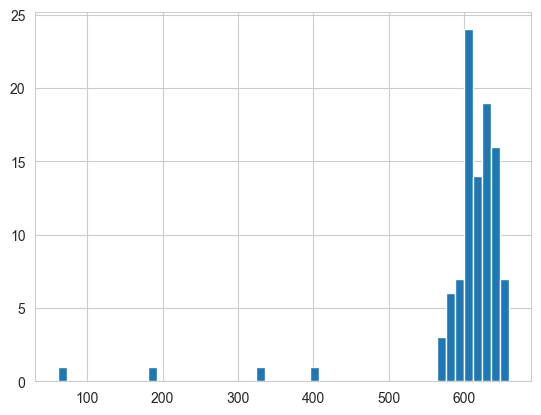

In [77]:
# duration_cnt.plot.bar(x='duration', y='session_cnt', figsize=(15, 5), bins=50)
# plt.bar(duration_cnt['duration'], duration_cnt['session_cnt'], bins=50)
# plt.hist(duration_cnt['session_cnt'], bins=50)
plt.hist(duration_cnt['session_cnt'][:100], bins=50)

In [15]:
len(duration_cnt['duration'].unique()) / len(duration_cnt['session_cnt'].unique())

5.627980922098569

In [79]:
data['duration_bins'] = pd.cut(data['duration'],
                               bins=[*range(0, 2401, 150), data['duration'].max()], 
                               include_lowest=True)

dur_bins = data.groupby('duration_bins')['session_id'].count().reset_index()
dur_bins = dur_bins.rename(columns={'session_id': 'session_cnt'}) 

# display(data['duration_bins'])
dur_bins

C:\Users\rusan\AppData\Local\Temp\ipykernel_70096\2937166290.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dur_bins = data.groupby('duration_bins')['session_id'].count().reset_index()


,duration_bins,session_cnt
0,"(-0.001, 150.0]",90992
1,"(150.0, 300.0]",91419
2,"(300.0, 450.0]",90578
3,"(450.0, 600.0]",84915
4,"(600.0, 750.0]",76672
5,"(750.0, 900.0]",68045
6,"(900.0, 1050.0]",58754
7,"(1050.0, 1200.0]",49975
8,"(1200.0, 1350.0]",41054
9,"(1350.0, 1500.0]",32947


Axes(0.125,0.11;0.775x0.77) <class 'matplotlib.axes._axes.Axes'>


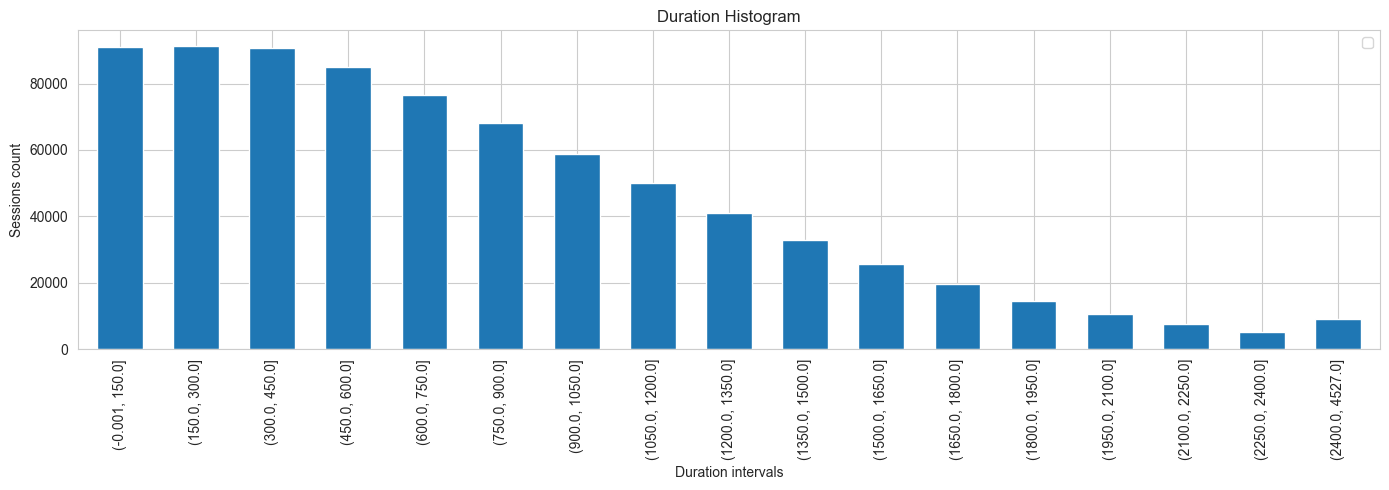

In [80]:
ax = dur_bins.plot.bar(x='duration_bins', y='session_cnt', figsize=(14, 5), width=0.6)
print(ax, type(ax))

fig = ax.get_figure()

plt.title("Duration Histogram")
plt.xlabel("Duration intervals")
plt.ylabel("Sessions count")
plt.legend('')
plt.tight_layout()
fig.savefig('res/1.png')

# plt.bar(x=duration_bins.duration_bins, height=duration_bins.session_id, width=1, align='center')